# Controlling Access

---

# Prior

In [1]:
class Drone3:
    
    num_drones = 0
    
    def __init__(self, altitude = 0): 
        self.altitude = altitude
        self.ascend_count = 0  
        Drone3.num_drones += 1 # you can't use self
    
    def fly(self):
        print("The drone is flying at", self.altitude, "feet")
    
    def ascend(self, change):
        self.altitude += change
        self.ascend_count += 1 # added this (without class attrib)

In [4]:
d5 = Drone3(100)
print("d5 ascend count ", d5.ascend_count)
d5.fly()
d5.ascend(100)
d5.ascend(200)
print("d5 ascend count ", d5.ascend_count)
d5.fly()

d5 ascend count  0
The drone is flying at 100 feet
d5 ascend count  2
The drone is flying at 400 feet


In [5]:
d6 = Drone3(100)
print("Number of drones", Drone3.num_drones)
print("d6 ascend count ", d5.ascend_count)
d6.fly()
d6.ascend(100)
d6.ascend(200)
print("d6 ascend count ", d5.ascend_count)
d6.fly()

Number of drones 3
d6 ascend count  2
The drone is flying at 100 feet
d6 ascend count  2
The drone is flying at 400 feet


In [6]:
d7 = Drone3() # takes 0
print("Number of drones", Drone3.num_drones)
print("d7 ascend count ", d7.ascend_count)
d7.fly()
d7.ascend(1350)
print("d7 ascend count ", d7.ascend_count)
d7.fly()
print("Number of drones", Drone3.num_drones)


Number of drones 4
d7 ascend count  0
The drone is flying at 0 feet
d7 ascend count  1
The drone is flying at 1350 feet
Number of drones 4


---

In [28]:
class Drone4:
    
    num_drones = 0
    
    def __init__(self, altitude=0):
        self.altitude = altitude
        self.ascend_count = 0
        Drone.num_drones += 1
    
    def fly(self):
        print("The drone is flying at", self.altitude, "feet")
        
    def ascend(self, change):
        self.altitude += change
        self.ascend_count += 1

In [29]:
d1 = Drone4(100)
print('the drone altitude is ', d1.altitude)

the drone altitude is  100


In [30]:
d1.altitude = 300
print('the drone altitude is ', d1.altitude)

the drone altitude is  300


In [31]:
d1.__dict__

{'altitude': 300, 'ascend_count': 0}

In [34]:
d1.ascend(100)

In [35]:
d1.altitude

500

In [36]:
d5 = Drone4(100)
print("d5 ascend count ", d5.ascend_count)
d5.fly()
d5.ascend(100)
d5.ascend(200)
print("d5 ascend count ", d5.ascend_count)
d5.fly()

d5 ascend count  0
The drone is flying at 100 feet
d5 ascend count  2
The drone is flying at 400 feet


---

---

# Getter and Setter (from Java legacy)

In [43]:
class Drone5:
    
    num_drones = 0
    
    def __init__(self, altitude=0):
        self.altitude = altitude
        self.ascend_count = 0
        Drone.num_drones += 1
    
    def fly(self):
        print("The drone is flying at", self.altitude, "feet")
        
    def ascend(self, change):
        self.altitude += change
        self.ascend_count += 1
    
    ############### new methods #############
    
    def get_altitude(self):
        return self.altitude
        # this just returns the altitude value 
    
    def set_altitude(self, new_altitude):
        self.altitude = new_altitude
        # this sets the new value of altitude

In [46]:
d1 = Drone5(100)
print('the drone altitude is ', d1.get_altitude())

d1.set_altitude(200)
print('the drone altitude is ', d1.get_altitude())

the drone altitude is  100
the drone altitude is  200


---

___

# Safety controls - ensure altitude is never < 0

In [47]:
class Drone5:
    
    num_drones = 0
    
    def __init__(self, altitude=0):
        self.altitude = altitude
        self.ascend_count = 0
        Drone.num_drones += 1
    
    def fly(self):
        print("The drone is flying at", self.altitude, "feet")
        
    def ascend(self, change):
        self.altitude += change
        self.ascend_count += 1
    
    ############### new methods #############
    
    def get_altitude(self):
        return self.altitude
        # this just returns the altitude value 
    
    def set_altitude(self, new_altitude):
        if new_altitude < 0:
            raise Exception("Drone cannot have negative altitude")
        self.altitude = new_altitude
        # this sets the new value of altitude

In [49]:
d2 = Drone5(100)
print('the drone altitude is ', d1.get_altitude())

d2.set_altitude(-10)
print('the drone altitude is ', d1.get_altitude())

the drone altitude is  -10


Exception: Drone cannot have negative altitude

---

# Controlling access to attributes

In [50]:
class Drone5:
    
    num_drones = 0
    
    def __init__(self, altitude=0):
        self.altitude = altitude
        self.ascend_count = 0
        Drone.num_drones += 1
    
    def fly(self):
        print("The drone is flying at", self.altitude, "feet")
        
    def ascend(self, change):
        self.altitude += change
        self.ascend_count += 1
    
    ############### new methods #############
    
    def get_altitude(self):
        return self.altitude
        # this just returns the altitude value 
    
    def set_altitude(self, new_altitude):
        if new_altitude < 0:
            raise Exception("Drone cannot have negative altitude")
        self.altitude = new_altitude
        # this sets the new value of altitude

In [52]:
d3 = Drone5(100)
print('the drone altitude is ', d3.get_altitude())



the drone altitude is  100


#### Bypass Set Attribute can be a problem

In [54]:
# bypass set_altitude to go -ve

# in this case, the set_attribute is not evoked at all

d3.altitude = -10
print('the drone altitude is ', d3.get_altitude())

the drone altitude is  -10


#### PRIVATE VARIABLE -- used in Java and C++

###### PYTHON DOES NOT HAVE PRIVATE VARIABLES

## Hidden Attributes

In [58]:
class Drone4:
    
    num_drones = 0
    
    def __init__(self, altitude=0):
        self.__altitude = altitude # note the __altitude
        self.ascend_count = 0
        Drone.num_drones += 1
    
    def fly(self):
        print("The drone is flying at", self.__altitude, "feet") # note the __altitude
        
    def ascend(self, change):
        self.__altitude += change # note the __altitude
        self.ascend_count += 1
    
    ############### new methods #############
    
    def get_altitude(self):
        return self.__altitude # note the __altitude
        # this just returns the altitude value 
    
    def set_altitude(self, new_altitude):
        if new_altitude < 0:
            raise Exception("Drone cannot have negative altitude")
        self.__altitude = new_altitude # note the __altitude
        # this sets the new value of altitude

d4 = Drone4(100)
print('the drone altitude is ', d4.get_altitude())

d4.__altitude = -10
print('the drone altitude is ', d4.get_altitude())

the drone altitude is  100
the drone altitude is  100


In [59]:
dir(d4)

['_Drone4__altitude',
 '__altitude',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'ascend',
 'ascend_count',
 'fly',
 'get_altitude',
 'num_drones',
 'set_altitude']

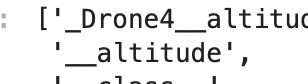  the soluiton did not work as it created a new attrivute as __altitude

In [61]:
d5 = Drone4(100)
print('the drone altitude is ', d4.get_altitude())

d5.set_altitude(300)
print('the drone altitude is ', d5.get_altitude())
print('the drone altitude is ', d5.__altitude())

the drone altitude is  100
the drone altitude is  300


AttributeError: 'Drone4' object has no attribute '__altitude'

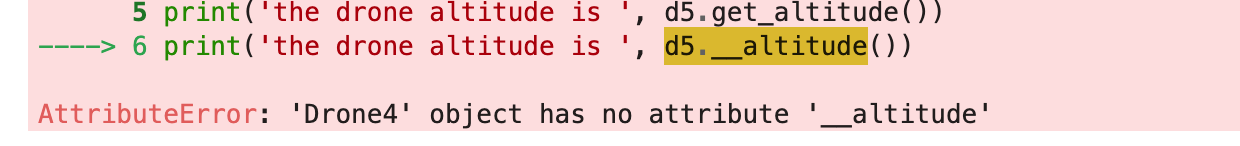

#### the __altitude cannot be accessed from the outside (using Print statement for now)

---

---

# Override Hidden Attributes

# Name Mangling

In [63]:
# we are all consenting adjults

# Python is not as restrictive as Java or C++
###### You have ways to access even hidden attributes

In [66]:
class Drone5:
    
    num_drones = 0
    
    def __init__(self, altitude=0):
        self.__altitude = altitude # note the __altitude
        self.ascend_count = 0
        Drone.num_drones += 1
    
    def fly(self):
        print("The drone is flying at", self.__altitude, "feet") # note the __altitude
        
    def ascend(self, change):
        self.__altitude += change # note the __altitude
        self.ascend_count += 1
    
    ############### new methods #############
    
    def get_altitude(self):
        return self.__altitude # note the __altitude
        # this just returns the altitude value 
    
    def set_altitude(self, new_altitude):
        if new_altitude < 0:
            raise Exception("Drone cannot have negative altitude")
        self.__altitude = new_altitude # note the __altitude
        # this sets the new value of altitude

d5 = Drone5(100)
print('the drone altitude is ', d5.get_altitude())

d5.set_altitude = 300
#print('the drone altitude is ', d5.altitude())
# print('the drone altitude is ', d5.__altitude())
print('the drone altitude is ', d5._Drone5__altitude())  ## THIS IS NAME MANGLING
print('the drone altitude is ', d5.get_altitude())

the drone altitude is  100


TypeError: 'int' object is not callable

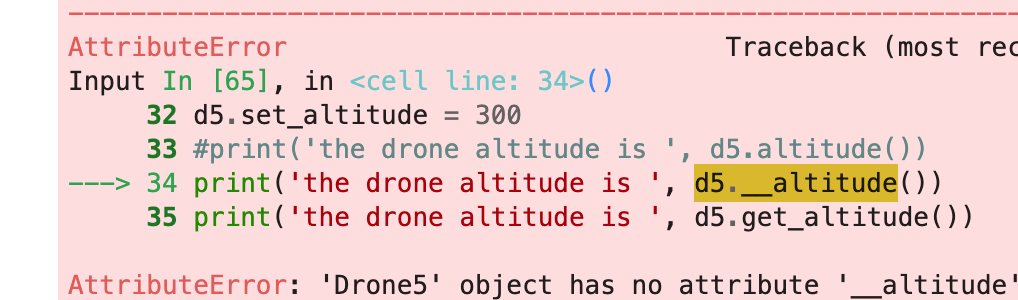

In [68]:
# using _Drone5__altitude should work

# earlier it was just __altitude
###### ew added _Drone5        ie the class with an underscore

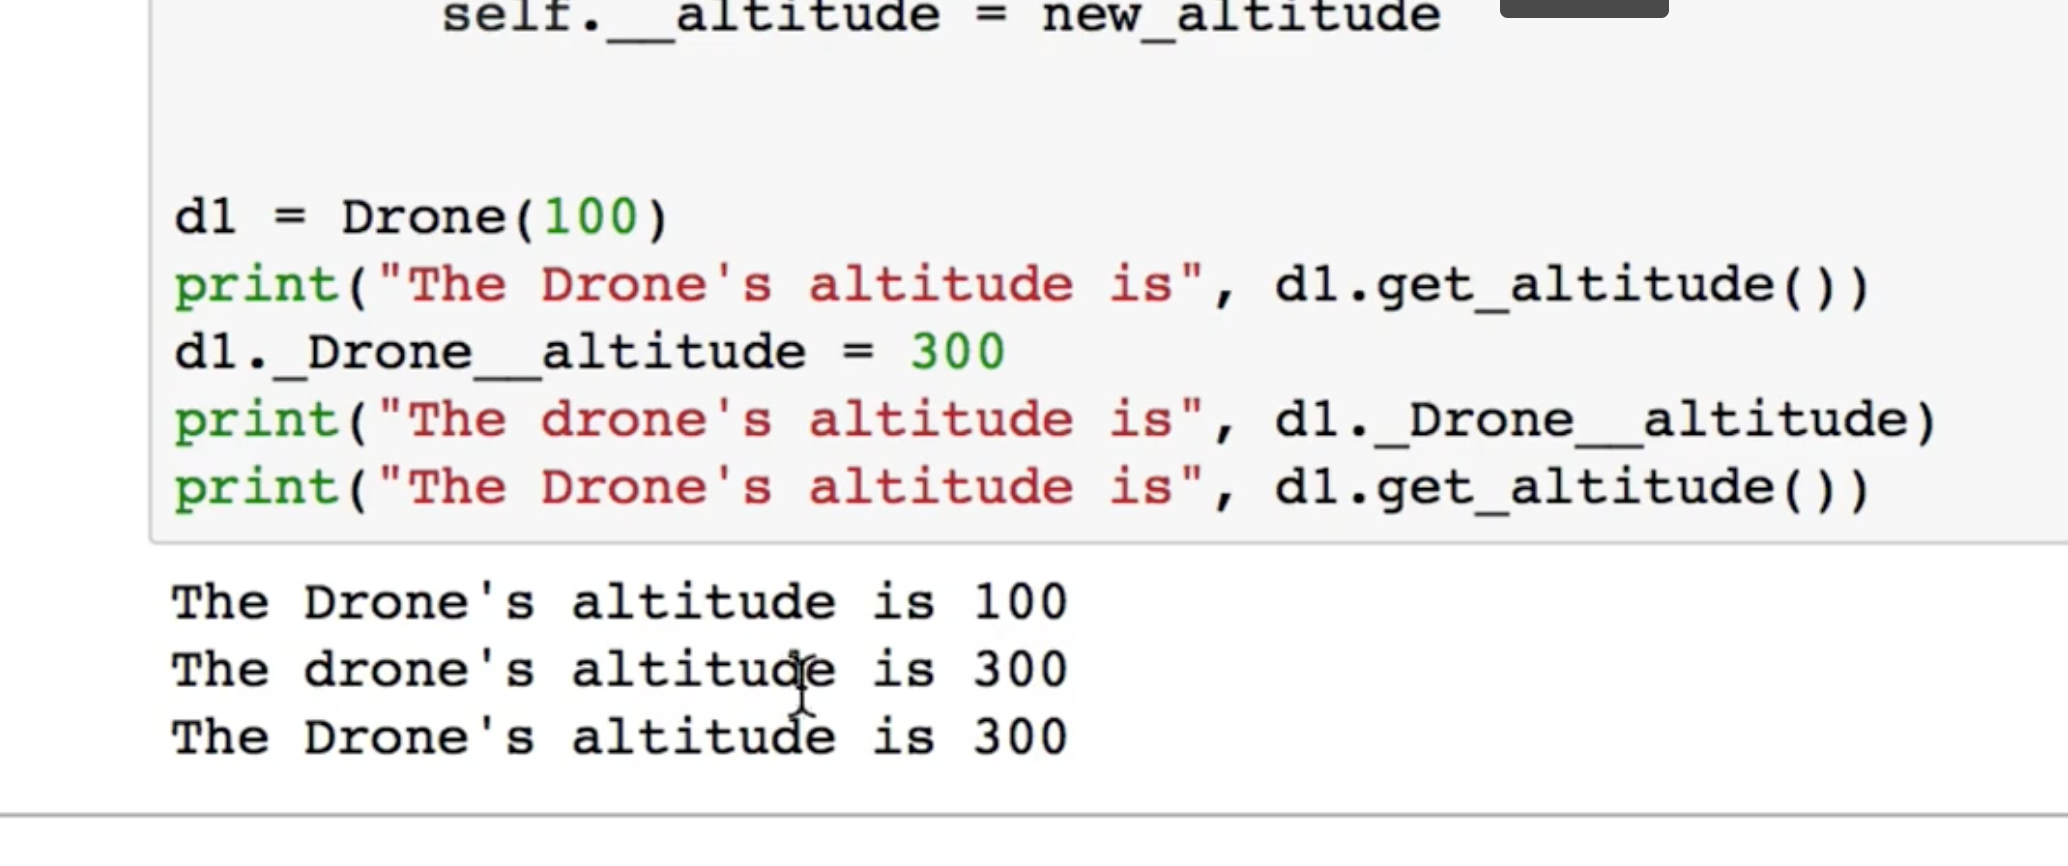